In [19]:
#https://github.com/bdecon/econ_data/blob/master/APIs/BEA.ipynb

import requests
import pandas as pd

In [40]:
# Components of request
base = f'https://apps.bea.gov/api/data/?&UserID='
dset = '&method=GetData&datasetname=NIPA'

tbl = 'T20306' # Real PCE by Major Type of Product: NIPA Table 2.3.6.
tbl = 'T10102' # Contributions to Percent Change in Real Gross Domestic Product: NIPA Table 1.1.2.

freq = '&Frequency=Q'
yr = ','.join(map(str, range(2015, 2021)))
fmt = '&ResultFormat=json'
url = f'{base}{dset}&TableName={tbl}{freq}&Year={yr}{fmt}'

In [41]:
# Request data
r = requests.get(url).json()['BEAAPI']['Results']
r

{'Statistic': 'NIPA Table',
 'UTCProductionTime': '2020-07-30T12:33:43.263',
 'Dimensions': [{'Ordinal': '1',
   'Name': 'TableName',
   'DataType': 'string',
   'IsValue': '0'},
  {'Ordinal': '2', 'Name': 'SeriesCode', 'DataType': 'string', 'IsValue': '0'},
  {'Ordinal': '3',
   'Name': 'LineNumber',
   'DataType': 'numeric',
   'IsValue': '0'},
  {'Ordinal': '4',
   'Name': 'LineDescription',
   'DataType': 'string',
   'IsValue': '0'},
  {'Ordinal': '5', 'Name': 'TimePeriod', 'DataType': 'string', 'IsValue': '0'},
  {'Ordinal': '6', 'Name': 'CL_UNIT', 'DataType': 'string', 'IsValue': '0'},
  {'Ordinal': '7', 'Name': 'UNIT_MULT', 'DataType': 'numeric', 'IsValue': '0'},
  {'Ordinal': '8',
   'Name': 'METRIC_NAME',
   'DataType': 'string',
   'IsValue': '0'},
  {'Ordinal': '9',
   'Name': 'DataValue',
   'DataType': 'numeric',
   'IsValue': '1'}],
 'Data': [{'TableName': 'T10102',
   'SeriesCode': 'A191RL',
   'LineNumber': '1',
   'LineDescription': 'Gross domestic product',
   'TimeP

In [67]:
d = {}

datalist = {'A191RL':'Gross domestic product',
            'DPCERY':'Personal consumption expenditures',
            'A008RY':'Nonresidential investments',
            'A011RY':'Residential investments',
            'A014RY':'Change in private inventories',
            'A019RY':'Net exports of goods and services',
            'A822RY':'Government consumption expenditures and gross investment'
           }

for series in list(datalist.keys()):
    data = [i['DataValue']
            for i in r['Data'] if i['SeriesCode'] == series]
    index = [pd.to_datetime(i['TimePeriod'])
             for i in r['Data'] if i['SeriesCode'] == series]
    d[series] = pd.Series(data=data, index=index)

df = pd.DataFrame(d)
df.columns = ['GDP','PCE','CAPEX','HOUSES','Inventory','NetExports','Government']
df = df.astype('float64')
df

,GDP,PCE,CAPEX,HOUSES,Inventory,NetExports,Government
2015-01-01,3.8,2.41,-0.07,0.26,2.28,-1.38,0.37
2015-04-01,2.7,2.15,0.24,0.34,-0.35,-0.25,0.60
2015-07-01,1.5,2.24,0.19,0.37,-0.69,-0.97,0.32
2015-10-01,0.6,1.44,-0.44,0.25,-0.64,-0.22,0.26
2016-01-01,2.3,2.08,-0.15,0.49,-0.73,-0.05,0.66
2016-04-01,1.3,1.73,0.31,-0.06,-0.83,0.22,-0.11
2016-07-01,2.2,1.75,0.61,-0.08,-0.50,0.08,0.33
2016-10-01,2.5,1.68,0.19,0.26,1.35,-1.13,0.19
2017-01-01,2.3,2.15,0.75,0.43,-1.41,0.36,0.01
2017-04-01,1.7,1.23,0.31,-0.04,0.34,-0.39,0.27


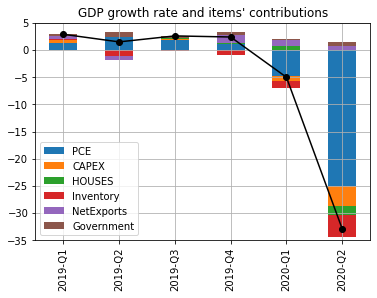

In [123]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

qdic = {'01':'Q1','04':'Q2','07':'Q3','10':'Q4'}

df1 = df['2019':]

#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

items = df1.GDP
temp = []
for s in list(items.index.format()):
    temp = temp + [s[:5]+qdic[s[5:7]]]
items.index = temp

ax1 = items.plot(legend=False,ylim=[-35,5],grid=True,color='Black',marker='o',
                 title= "GDP growth rate and items' contributions")

items = df1.iloc[:,1:]

temp = []
for s in list(items.index.format()):
    temp = temp + [s[:5]+qdic[s[5:7]]]
items.index = temp
items.plot(ax=ax1,kind='bar',stacked=True,ylim=[-35,5],grid=True)

#ax.xaxis.set_major_locator(mdates.QuarterlyLocator())
#ax.xaxis.set_major_formatter(DateFormatter('%Y-%b'))


In [124]:
tbl = 'T10202' # Contributions to Percent Change
               # in Real Gross Domestic Product by Major Type of Product: NIPA Table 2.3.6.
url = f'{base}{dset}&TableName={tbl}{freq}&Year={yr}{fmt}'
r = requests.get(url).json()['BEAAPI']['Results']
r

{'Statistic': 'NIPA Table',
 'UTCProductionTime': '2020-07-30T13:56:37.737',
 'Dimensions': [{'Ordinal': '1',
   'Name': 'TableName',
   'DataType': 'string',
   'IsValue': '0'},
  {'Ordinal': '2', 'Name': 'SeriesCode', 'DataType': 'string', 'IsValue': '0'},
  {'Ordinal': '3',
   'Name': 'LineNumber',
   'DataType': 'numeric',
   'IsValue': '0'},
  {'Ordinal': '4',
   'Name': 'LineDescription',
   'DataType': 'string',
   'IsValue': '0'},
  {'Ordinal': '5', 'Name': 'TimePeriod', 'DataType': 'string', 'IsValue': '0'},
  {'Ordinal': '6', 'Name': 'CL_UNIT', 'DataType': 'string', 'IsValue': '0'},
  {'Ordinal': '7', 'Name': 'UNIT_MULT', 'DataType': 'numeric', 'IsValue': '0'},
  {'Ordinal': '8',
   'Name': 'METRIC_NAME',
   'DataType': 'string',
   'IsValue': '0'},
  {'Ordinal': '9',
   'Name': 'DataValue',
   'DataType': 'numeric',
   'IsValue': '1'}],
 'Data': [{'TableName': 'T10202',
   'SeriesCode': 'A191RL',
   'LineNumber': '1',
   'LineDescription': 'Gross domestic product',
   'TimeP

In [125]:
d = {}

datalist = {'A191RL':'Gross domestic product',
            'A353RY':'Goods',
            'A341RY':'Services',
            'A755RY':'Structures',
           }

for series in list(datalist.keys()):
    data = [i['DataValue']
            for i in r['Data'] if i['SeriesCode'] == series]
    index = [pd.to_datetime(i['TimePeriod'])
             for i in r['Data'] if i['SeriesCode'] == series]
    d[series] = pd.Series(data=data, index=index)

df = pd.DataFrame(d)
df.columns = ['GDP','Goods','Services','Structures']
df = df.astype('float64')
df

,GDP,Goods,Services,Structures
2015-01-01,3.8,1.55,2.22,0.07
2015-04-01,2.7,0.78,1.25,0.70
2015-07-01,1.5,0.20,1.28,-0.02
2015-10-01,0.6,-0.20,1.29,-0.44
2016-01-01,2.3,0.71,1.27,0.31
2016-04-01,1.3,0.00,1.22,0.03
2016-07-01,2.2,0.52,1.33,0.34
2016-10-01,2.5,1.07,0.94,0.53
2017-01-01,2.3,0.23,1.43,0.62
2017-04-01,1.7,1.39,0.37,-0.04


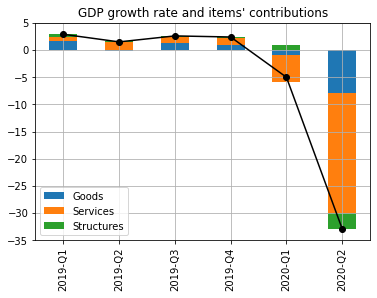

In [126]:
df1 = df['2019':]

#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

items = df1.GDP
temp = []
for s in list(items.index.format()):
    temp = temp + [s[:5]+qdic[s[5:7]]]
items.index = temp

ax1 = items.plot(legend=False,ylim=[-35,5],grid=True,color='Black',marker='o',
                 title= "GDP growth rate and items' contributions")

items = df1.iloc[:,1:]

temp = []
for s in list(items.index.format()):
    temp = temp + [s[:5]+qdic[s[5:7]]]
items.index = temp
items.plot(ax=ax1,kind='bar',stacked=True,ylim=[-35,5],grid=True)